In [56]:
%matplotlib inline
import pandas as pd
import seaborn as sns

In [57]:
df = pd.read_csv('PyConLT 2017 - Lapas1.csv')
df.shape

(179, 17)

In [58]:
df = df.drop(['Vardas', 'El. paštas', 'Tel, www ar kt kontaktai'],axis=1)

In [59]:
df.sample(5)

,Laiko žymė,Kiek metų programuoji Python?,Siūlomas pranešimas,Kokias temas norėtum išgirsti?,Miestas,Laisvos formos komentaras,Kokias Python priemones daugiausia naudoji?,Kokios problemos dažniausiai iškyla programuojant?,Įmonės pavadinimas (įdarbinimo sesijai),Darbas/ai,Kiek metų programuoji apskritai?,Siūlomo pranešimo (žmogiškoji) kalba,Unnamed: 15,Unnamed: 16
157,2017-05-12 07:32:54,iki 1,NaN,Odoo connector,Vilnius,NaN,Odoo,NaN,NaN,NaN,1..3,NaN,NaN,NaN
42,2017-03-27 18:05:55,1..3,NaN,NaN,Vilnius,NaN,"Django, Pandas",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-03-12 12:18:17,1..3,NaN,"Microservices, artificial intelligence, machin...",Kaunas,NaN,"Pandas, microservices stuff",NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,2017-03-13 12:22:11,3 ir daugiau..,NaN,"TDD, Google API's + Python",Klaipėda 🚗,NaN,"Django, Pandas",NaN,NaN,NaN,NaN,NaN,NaN,NaN
137,2017-05-10 20:34:32,iki 1,NaN,NaN,NaN,NaN,Django,NaN,NaN,NaN,1..3,NaN,NaN,NaN


# Laikas

In [60]:
df['Laiko žymė'] = df['Laiko žymė'].astype('datetime64')

In [61]:
df = df.set_index('Laiko žymė')

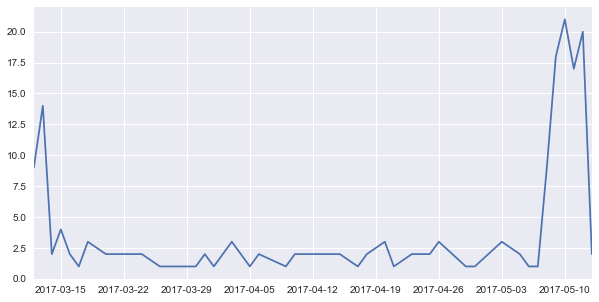

In [62]:
df.groupby(df.index.date).size().plot(figsize=[10,5])

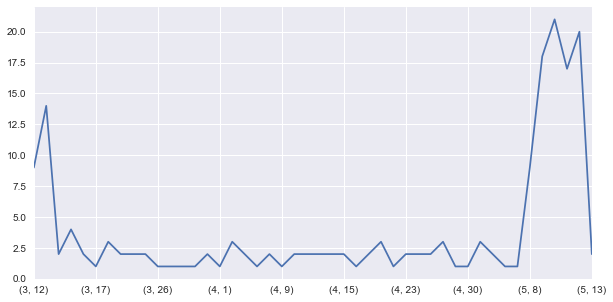

In [85]:
df.groupby([df.index.month, df.index.day]).size().plot(figsize=[10,5])

In [64]:
data = df.groupby([df.index.weekday, df.index.hour]).size().unstack().T

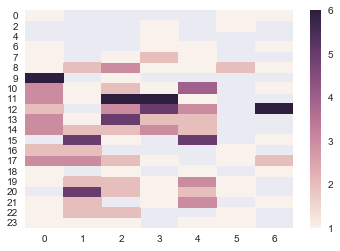

In [65]:
sns.heatmap(data)

## Kiek programuoja atskirai ir ...

In [66]:
data = df[['Kiek metų programuoji apskritai?', 'Kiek metų programuoji Python?']]

In [67]:
data = data.dropna()
data.shape

(100, 2)

In [68]:
data = data.groupby(['Kiek metų programuoji apskritai?', 'Kiek metų programuoji Python?']).size().unstack()

In [69]:
index = ['kol kas tik domiuosi', 'iki 1', '1..3', '3 ir daugiau..']

In [70]:
data = data.loc[index[::-1], index]

In [71]:
data

Kiek metų programuoji Python?,kol kas tik domiuosi,iki 1,1..3,3 ir daugiau..
Kiek metų programuoji apskritai?,,,,
3 ir daugiau..,14.0,10.0,13.0,11.0
1..3,9.0,14.0,7.0,NaN
iki 1,6.0,5.0,1.0,NaN
kol kas tik domiuosi,10.0,NaN,NaN,NaN


In [72]:
import seaborn as sns

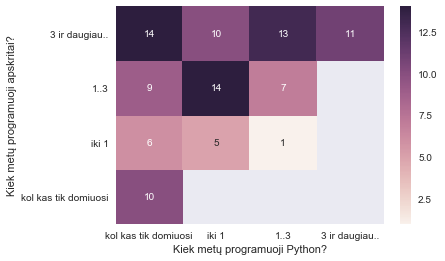

In [73]:
sns.heatmap(data, annot=True)

# Split categorical 

In [74]:
from collections import Counter

In [75]:
l = []
for x in df['Kokias Python priemones daugiausia naudoji?'].dropna().str.split(', ').values.tolist():
    l += x

In [76]:
value_counts = Counter(l).most_common(5)

In [77]:
value_counts

[('Django', 58), ('Pandas', 23), ('Odoo', 18), ('flask', 12), ('sklearn', 11)]

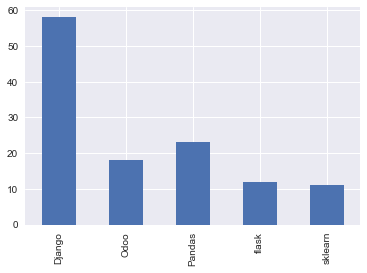

In [78]:
pd.Series(dict(value_counts)).plot(kind='bar')

In [79]:
df['Kokias temas norėtum išgirsti?'].dropna().values.tolist()

['Microservices, artificial intelligence, machine learning',
 'Visas',
 'odoo',
 'apie grumpy',
 'Async panaudojimo atvejai, monitoring, HTTP2',
 "Django ateitis web'e, python taikymas kartu su kitom technologijom.",
 'Best practices; Performance',
 "TDD, Google API's + Python",
 'metaclasses,  networkX, odoo ORM, Rpi',
 'Nepraktiškas; filosofines; ateities spėlionių :)',
 'duomenu analitika',
 'Praktinio panaudojimo pvz naujokams',
 'Python + Spatial (GIS)',
 'Game, app development',
 'Celery, Django, REST, Pyramid',
 'Duomenų analizė.',
 'E-commerce, performance optimisation, use cases, interesting tools.',
 'Async, debbuging threaded/multiprocess applications, remote debugging',
 'Data scraping, data mining, web, async, sanic.',
 'Django, web, duomenų apdorojimas, optimizacijos, testavimas',
 'Python ir Docker',
 'Geros praktikos',
 'Darbo paieškos ir projekto struktūrizavimas laisvai samdomiem programuotojam.',
 'asyncio, multiprocessing, new features in newer python versions, pypy

# "Social" network analysis

In [80]:
import networkx as nx
import itertools
import matplotlib.pyplot as plt

In [81]:
data = df['Kokias Python priemones daugiausia naudoji?'].dropna().str.split(', ').values.tolist()
l = []
for x in data:
    if len(x) > 1:
        x = [i for i in x if i]
        combinations = itertools.combinations(x, 2)
        combinations = list(combinations)
        l.extend(combinations)
        
c = Counter(l)
most_common = c.most_common()
edgelist = [(edge[0], edge[1], {'Weight':weight}) 
            for edge, weight 
            in most_common]
g = nx.from_edgelist(edgelist)


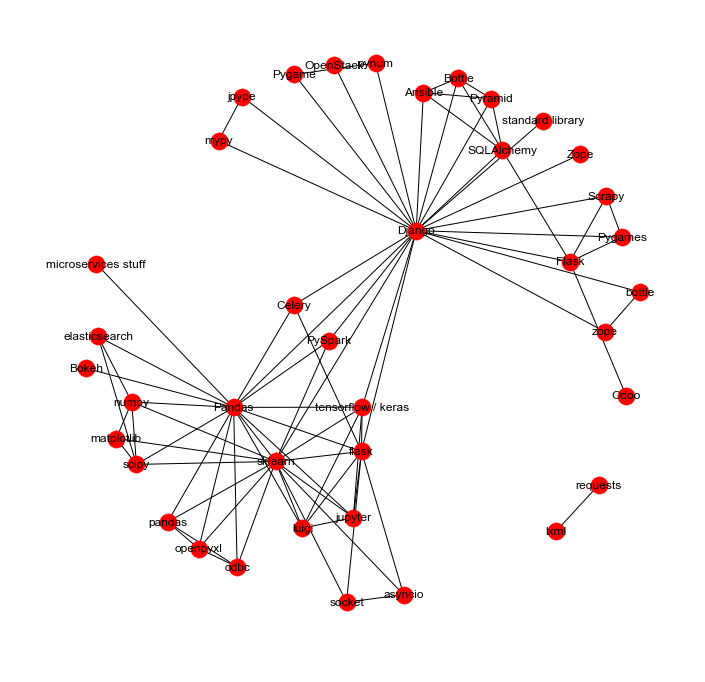

In [82]:
plt.figure(figsize=(12, 12))
limits=plt.axis('off')
nx.draw_networkx(g, pos=nx.spring_layout(g))

In [114]:
df['Kokios problemos dažniausiai iškyla programuojant?'].dropna().values

array(['klaidos runtime metu', 'Async python',
       'Rasti kuri sistemos dalis sukelia problemą tada kai vyksta N procesų paraleliai, kai problema nutinka tik retkarčiais',
       'scaling, bans, cuncurrency',
       'kaip visuomet, vargina debuginimas, nemoku testuot, IDE pasirinkimas palieka tik su PyCharm arba heavy modifikuotu sublime.',
       'testavimas (pas mane pusiau automatinis), UI testavimas',
       'Didelės kodo bazės suvaldymas; Per sudėtinga "mandra" architektūra;',
       'Debug remote processes',
       'Django neturi palaikymo vienai ar kitai funkcijai, kuri reikalinga; django sql optimizacijos bėdos',
       'Suraizgytas ir nedokumentuotas legacy kodas',
       'Django ir Flask projektų struktūros. Config failai ir jų naudojimas Flask projekte',
       'Pagrindinės problemos kyla su tvarkingu kodo rašymų, kaip tvarkingai rašyti kodą, kokia turi būti projekto struktūra ir pan.',
       'Atrasti geriausias praktikas programuojant Flask',
       'Python 2/3 compatib

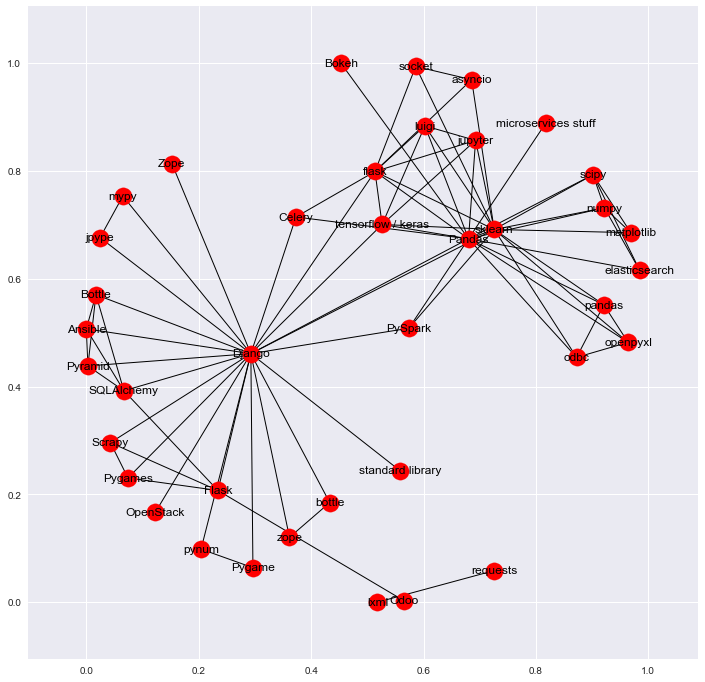

In [84]:
plt.figure(figsize=(12,12)) 
nx.draw_networkx(g)